### Treść zadania

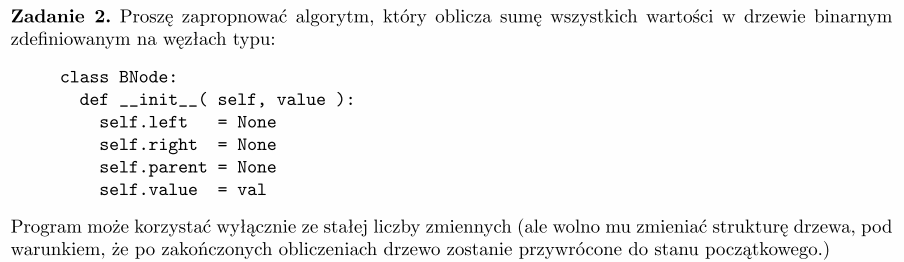

### Omówienie algorytmu

Algorytm implementacyjnie jest prosty i polega na użyciu funkcji z wykładu. Korzystamy najpierw z funkcji, która wyznacza minimum, a więc znajduje węzeł o namniejszym kluczu (złożoność $ O(h) $), a następnie wykonujemy coś w rodzaju iteracji po wartościahc w drzewie, czyli wywołujemy funkcję, znajdującą następnika bieżącego węzła, dopóki następnik istnieje. Po każdej operacji dodajemy wartość bieżącego węzła do wyniku.
<br><br>
Zastanawiające się może wydawać, dlaczego szukanie następnika daje nam złożoność sumarycznie $ O(n) $. Normalnie szukanie następnika ma najgorszą złożoność $ O(h) $, ale najlepszą $ O(1) $ (gdy bierzemy prawe dziecko lub cofamy się do rodzica i bierzemy od razu jego rodzica). Tutaj zaczyanmy od najmniejszego węzła, a więc po drzewie przejdziemy tylko 2 razy - raz idąc do prawych dzieci, w poszukiwaniu następnika, a drugi raz - cofając się do rodzica, dla którego bieżący węzeł jest lewym dzieckiem (jeżeli bieżący węzeł nie ma prawego poddrzewa).

### Złożoność

###### Obliczeniowa:
$ O(n) $
###### Pamięciowa:
$ O(1) $

### Implementacja

In [1]:
class BSTNode:
    def __init__(self, key):
        self.key = key
        self.parent = self.left = self.right = None

        
class BST:
    def __init__(self):
        self.root = None
        
    @property
    def min(self):
        return self.min_child(self.root)
        
    def min_child(self, node):
        while node.left:
            node = node.left
        # Return a node of the minimum key
        return node

    def successor(self, node):
        if node.right:
            return self.min_child(node.right)
        while node.parent:
            if node.parent.left == node:
                return node.parent
            node = node.parent
        return None
        
    def sum_keys(self):
        node = self.min
        total = 0
        while node:
#             print(node.key)
            total += node.key
            node = self.successor(node)
        return total

##### Pomocnicze:

In [2]:
def insert(self, key):
        node = BSTNode(key)
        if not self.root:
            self.root = node    
        else:
            curr = self.root
            while True:
                # Enter the right subtree if a key of a value inserted is
                # greater than the key of the current BST node
                if node.key > curr.key:
                    if curr.right: 
                        curr = curr.right
                    else: 
                        curr.right = node
                        node.parent = curr
                        break
                # Enter the left subtree if a key of a value inserted is
                # lower than the key of the current BST node
                elif node.key < curr.key:
                    if curr.left:
                        curr = curr.left
                    else:
                        curr.left = node
                        node.parent = curr
                        break
                # Return False if a node with the same key already exists
                # (We won't change its value)
                else:
                    return False
        # Return True if an object was successfully inserted to BST
        return True
    
BST.insert = insert

##### Pomocnicze

In [3]:
def binary_tree_string(tree_root, *, fn=lambda node: node.key):
    if not tree_root: return ''

    # Store data from a tree
    data = []
    lvl_nodes = [tree_root]
    just = 1

    while True:
        if not lvl_nodes: break

        curr_row = []
        branches = []
        next_nodes = []

        if not any(lvl_nodes):
            break

        for node in lvl_nodes:
            if not node:
                curr_row.append('')
                branches.extend([' ', ' '])
                next_nodes.extend([None, None])
            else:
                val = str(fn(node))
                just = max(len(val), just)
                curr_row.append(val)

                if node.left:
                    next_nodes.append(node.left)
                    branches.append('/')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

                if node.right:
                    next_nodes.append(node.right)
                    branches.append('\\')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

        data.append((curr_row, branches))
        lvl_nodes = next_nodes

    begin_sep = sep = 3 if just % 2 else 2
    data_iter = iter(data[::-1])
    result = [''] * (len(data) * 2 - 1)
    result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

    # Format the tree string
    for i, (values, branches) in enumerate(data_iter):
        mul = 2 * i + 1
        # Values
        indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
        sep = 2 * sep + just
        result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
        # Branches
        branch_indent = (3 * indent + just) // 4
        branches_row = []
        d_indent = indent - branch_indent
        branches_sep = ' ' * (2 * (d_indent - 1) + just)
        for i in range(0, len(branches), 2):
            branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1]}")
        result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

    return '\n'.join(result)

##### Testy

In [4]:
import random

t = BST()
vals = list(set([random.randint(0, 20) for _ in range(10)]))
random.shuffle(vals)

for n in vals:
    t.insert(n)
    
print('Tree keys:')
print(binary_tree_string(t.root))
print()
print('Expected sum:', sum(vals))
print('Calculated sum:', t.sum_keys())

Tree keys:
                              9 
                       /              \
              0                               18
                  \                                
                      1                                 
                        \                                
                          5                                 
                          /\                                
                        2   6                                 

Expected sum: 41
Calculated sum: 41
